In [1]:
# path to user functions
import sys  
sys.path.append('../Src/')

from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import importlib 

# import user functions
import UserUtilityFunctions as uf
import UserStatisticalFunctions as usf
import UserVisualization as uv
import UserImputeFunctions as ui

# set seaborn theme
sns.set_theme()

# initializing variables
REMOVE = '** REMOVE ** DROPNANS Prep'
RANDOM_STATE = 1776

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# initialize DataFrame
df_new = pd.DataFrame(columns=['column'])

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# import data
df = pd.read_pickle("../Data/Clean_Heart_Engineer.pkl")
df_label = pd.read_pickle("../Data/Clean_Label_Engineer.pkl")
df_can = pd.read_pickle("../Data/Clean_CAN_Engineer.pkl")
df_don = pd.read_pickle("../Data/Clean_DON_Engineer.pkl")
df_both = pd.read_pickle("../Data/Clean_BOTH_Engineer.pkl")
df_nominal = pd.read_pickle("../Data/Clean_Nominal_Engineer.pkl")
df_ordinal = pd.read_pickle("../Data/Clean_Ordinal_Engineer.pkl")
df_numeric = pd.read_pickle("../Data/Clean_Numeric_Engineer.pkl")
df_object = pd.read_pickle("../Data/Clean_Object_Engineer.pkl")
df_date = pd.read_pickle("../Data/Clean_Date_Engineer.pkl")
df_dict = pd.read_pickle("../Data/Clean_Dictionary_Engineer.pkl")
df_drop = pd.read_pickle("../Data/Clean_Drop_Engineer.pkl")
df_unknown = pd.read_pickle("../Data/Clean_Unknown_Engineer.pkl")
df_new = pd.read_pickle("../Data/Clean_New_Engineer.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

### Feature Information

In [3]:
print(f"Heart Dataset Rows: {df.shape[0]:,} & Columns: {df.shape[1]:,}")
print(f"Label Features: {df_label.shape[0]:,}")
print(f"Candidate Features: {df_can.shape[0]:,}")
print(f"Donor Features: {df_don.shape[0]:,}")
print(f"Date Features: {df_date.shape[0]:,}")
print(f"Both Features: {df_both.shape[0]:,}")
print(f"Object Features: {df_object.shape[0]:,}")
print(f"Numeric Features: {df_numeric.shape[0]:,}")
print(f"Ordinal Features: {df_ordinal.shape[0]:,}")
print(f"Nominal Features: {df_nominal.shape[0]:,}")
print(f"Drop Features: {df_drop.shape[0]:,}")
print(f"Unknown Features: {df_unknown.shape[0]:,}")
print(f"New Features: {df_new.shape[0]:,}")
print(f"Dictionary Features: {df_dict.shape[0]:,}")

Heart Dataset Rows: 16,126 & Columns: 259
Label Features: 15
Candidate Features: 131
Donor Features: 96
Date Features: 0
Both Features: 22
Object Features: 0
Numeric Features: 70
Ordinal Features: 13
Nominal Features: 176
Drop Features: 25
Unknown Features: 0
New Features: 29
Dictionary Features: 302


### Remove Unwanted Features

In [4]:
# remove unwanted labels
removeCols = df_label.column[~df_label.column.isin(['TransplantSurvivalDay'])].to_list()

# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 14 row(s) from df_label DataFrame.
Remove 0 row(s) from df_can DataFrame.
Remove 0 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 1 row(s) from df_ordinal DataFrame.
Remove 10 row(s) from df_nominal DataFrame.
Remove 3 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['AcuteRejectionEpisode', 'AirwayDehiscencePostTransplant', 'DialysisPostDischarge', 'FunctionalStatusFollowUp', 'GraftFailStatus', 'GraftLifeSpanDay', 'GraftStatus', 'LastFollowupNumber', 'LengthOfStay', 'PacemakerPostTransplant', 'RecipientStatus', 'RejectionTreatmentWithinOneYear', 'StrokePostTransplant', 'TransplantStatus']

Total Row(s) & Column(s) Before Removing Column(s): 16,126 & columns: 259
Total Row(s) & Column(s) After Removing Column(s): 16,126 & columns: 245


### User Function(s)

In [5]:
def getFeatureList(data, string):
    # initialize features and sort them alphabetically
    features = sorted(data.columns[data.columns.str.contains(string)].tolist())

    # display
    print(data[features].describe(include='all').T.to_string())
    print("\n:::: NaN Count:")
    print(data[features].isna().sum().sort_index().to_string())

    return features


### Wrangle Data

#### Remove NaNs

In [6]:
# remove all NaNs
df_removeNaNs = df.dropna()

# shape
print(f"Total Number of Rows: {df_removeNaNs.shape[0]} & Total Number of Features {df_removeNaNs.shape[1]}")

Total Number of Rows: 9850 & Total Number of Features 245


In [7]:
# initialize list
removeCols = df_drop.column.to_list()

# remove features 
df_removeNaNs, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df_removeNaNs, removeCols, df_dict, \
                                                    df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 17 row(s) from df_can DataFrame.
Remove 8 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 25 row(s) from df_numeric DataFrame.
Remove 25 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['Age_CAN', 'Age_DON', 'BMI_CAN', 'BMI_DON', 'CPRA_Peak_CAN', 'CPRA_Recent_CAN', 'CreatinineRegistration_CAN', 'CreatinineTransplant_CAN', 'Creatinine_DON', 'HeightCm_CAN', 'HeightCm_DON', 'HemodynamicsRegistration_PA_DIA_CAN', 'HemodynamicsRegistration_PA_MN_CAN', 'HemodynamicsRegistration_PCW_CAN', 'HemodynamicsRegistration_SYS_CAN', 'HemodynamicsTransplant_PA_DIA_CAN', 'HemodynamicsTransplant_PA_MN_CAN', 'HemodynamicsTransplant_PCW_CAN', 'HemodynamicsTransplant_SYS_CAN', 'Level_SGOT_ALT_DON',

#### Examine NaNs: Full Dataset

In [8]:
# all new features
new = df_new.column.to_list()
# all features
entire = df.columns.to_list()
# remove new from list
result = list(set(entire) - set(new))

# get NaNs
NaNsDF = uf.percentageNull(df[result])

# display NaNs
NaNsDF

,percentage,NaNCount
CPRA_Peak_CAN,24.215553,3905
CPRA_Recent_CAN,24.134937,3892
HemodynamicsTransplant_PCW_CAN,9.636612,1554
HemodynamicsRegistration_PCW_CAN,9.047501,1459
HemodynamicsTransplant_CO_CAN,6.808880,1098
HemodynamicsTransplant_PA_MN_CAN,6.114349,986
HemodynamicsRegistration_CO_CAN,5.494233,886
HemodynamicsTransplant_PA_DIA_CAN,5.239985,845
HemodynamicsTransplant_SYS_CAN,5.190376,837
HemodynamicsRegistration_PA_MN_CAN,4.198189,677


#### CPRA

In [9]:
# examine features
features = getFeatureList(df[result], 'CPRA')

                   count       mean        std  min  25%  50%   75%    max
CPRA_Peak_CAN    12221.0  14.897144  26.561462  0.0  0.0  0.0  19.0  100.0
CPRA_Recent_CAN  12234.0  11.228462  23.407934  0.0  0.0  0.0   7.0  100.0

:::: NaN Count:
CPRA_Peak_CAN      3905
CPRA_Recent_CAN    3892


In [10]:
df[features].corr()

,CPRA_Peak_CAN,CPRA_Recent_CAN
CPRA_Peak_CAN,1.000000,0.901605
CPRA_Recent_CAN,0.901605,1.000000


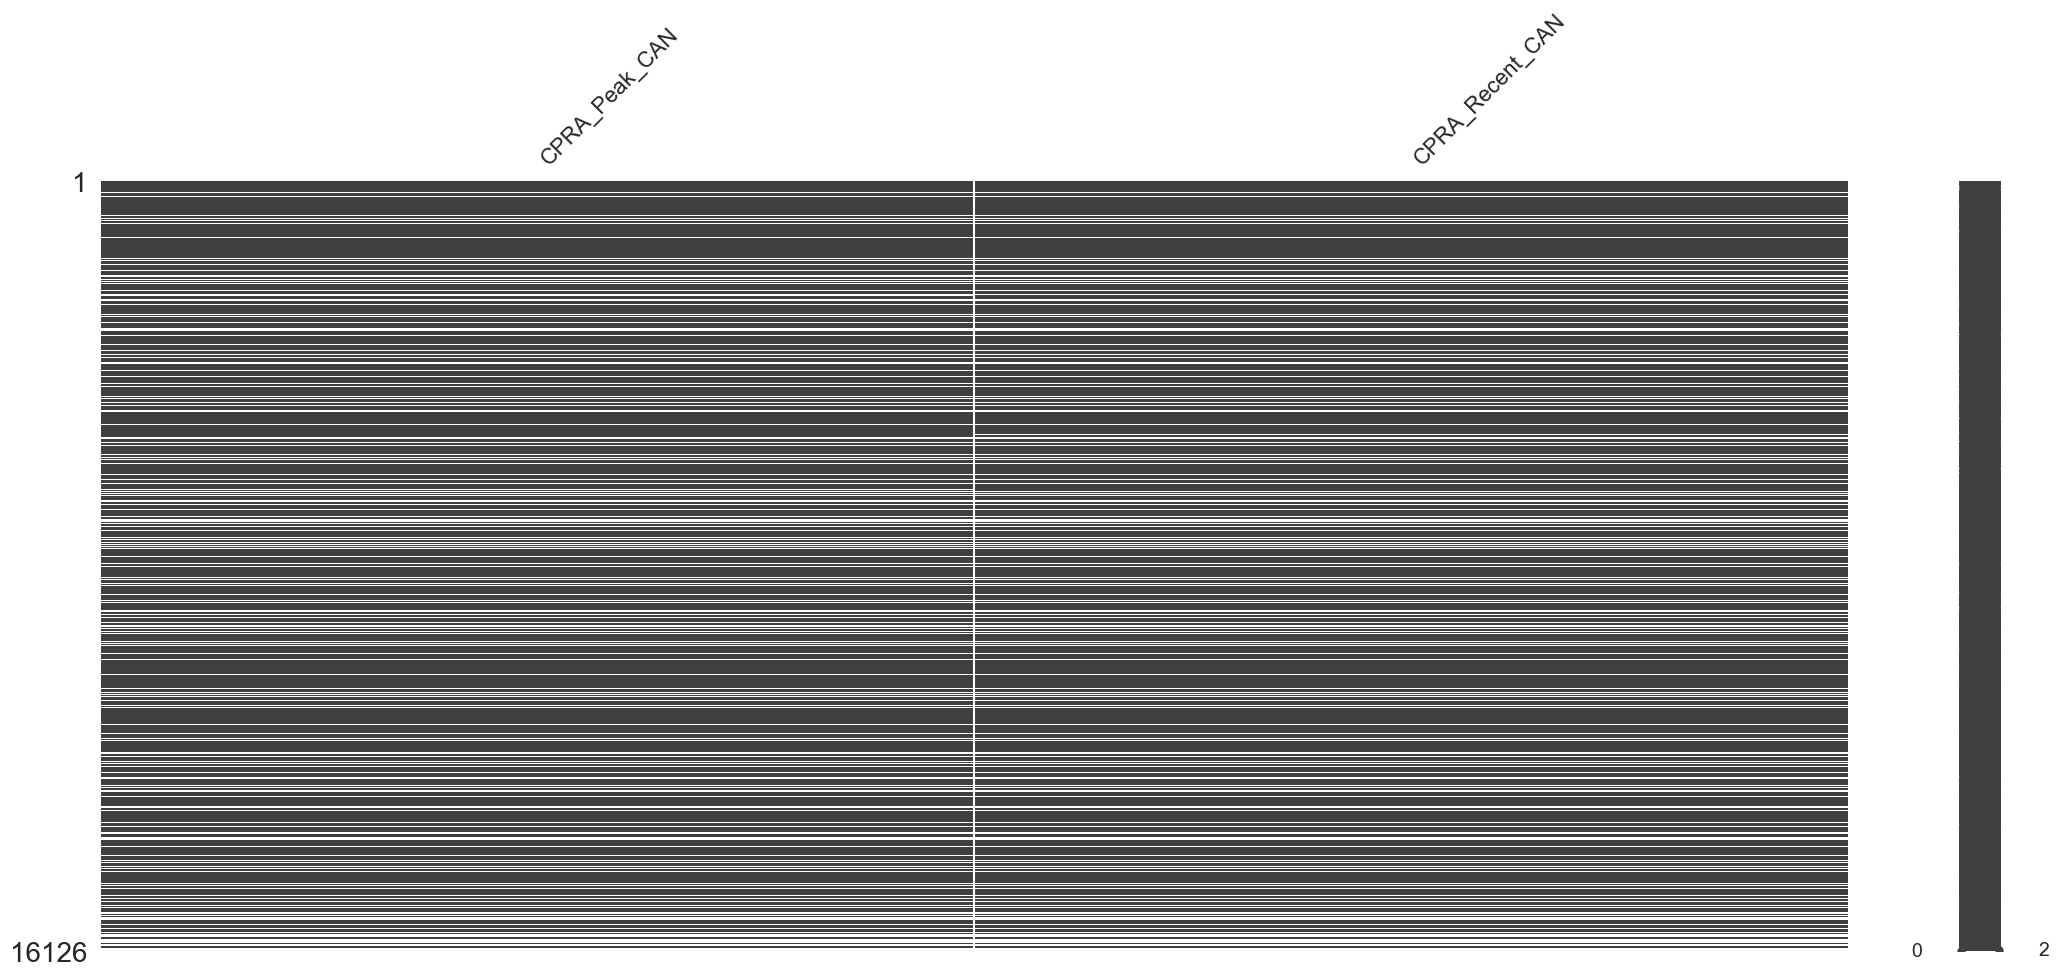

In [11]:
# plot missing data
uv.plotMissingData(df[features])

In [12]:
# hypothesis testing
usf.testMCAR(df[features])

Little's MCAR test p-value: 0.0000
Reject null hypothesis: Data is not Missing Completely At Random (MCAR).


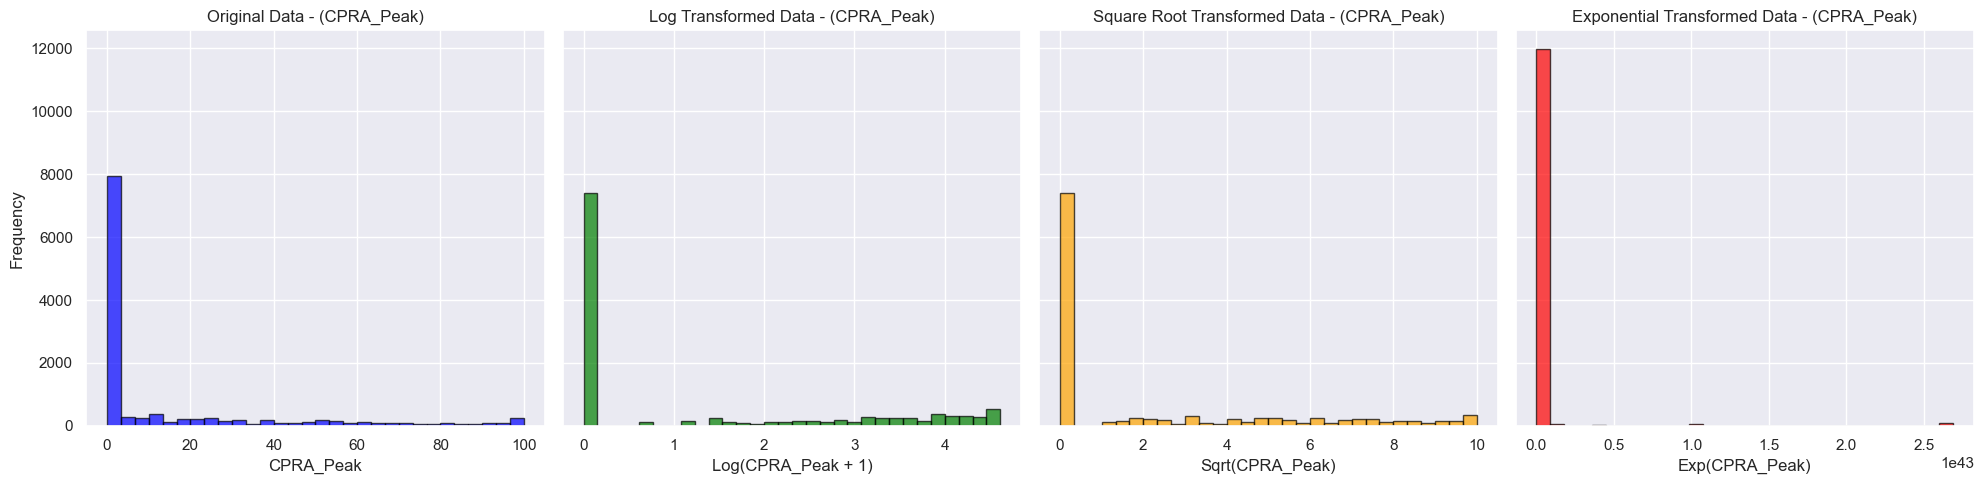

In [13]:
uv.transformPlots(df['CPRA_Peak_CAN'], txt='CPRA_Peak')

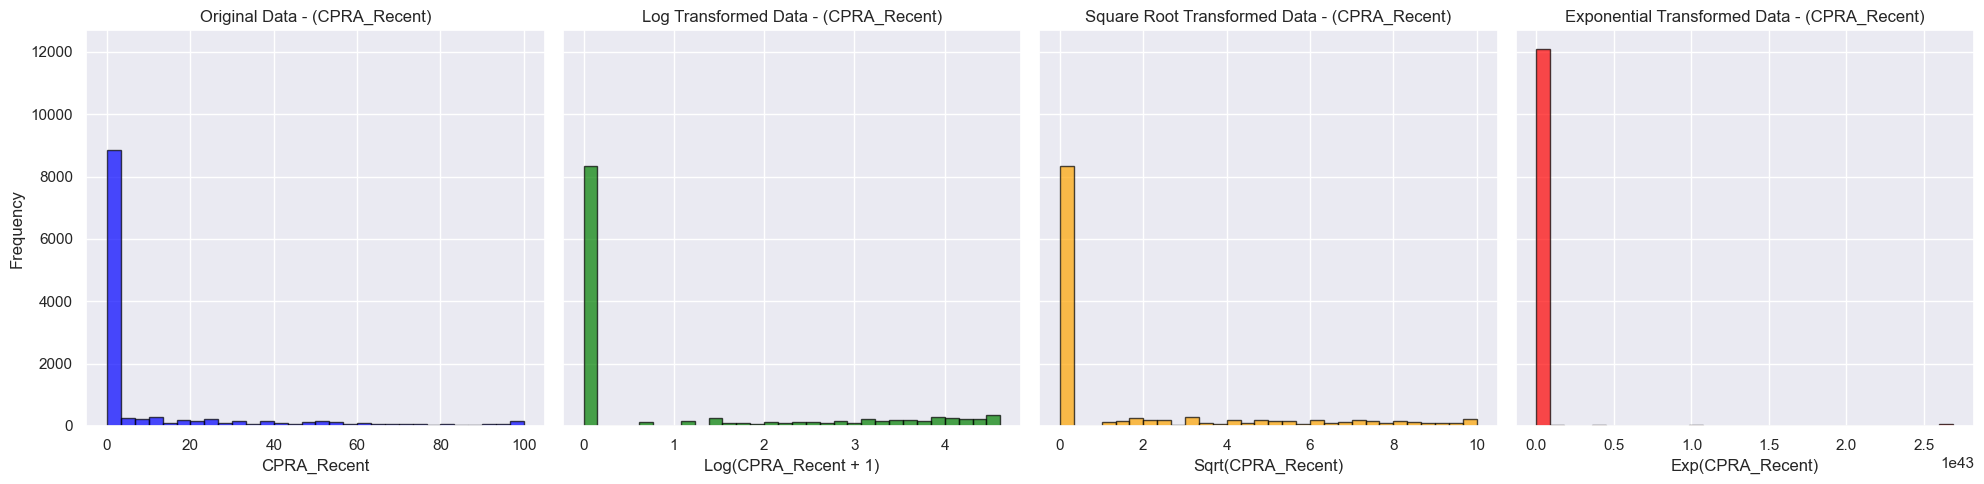

In [14]:
uv.transformPlots(df['CPRA_Recent_CAN'], txt='CPRA_Recent')

In [15]:
# uv.transformPlots(transformed_df['CPRA_Recent_CAN'], txt='CPRA_Recent')

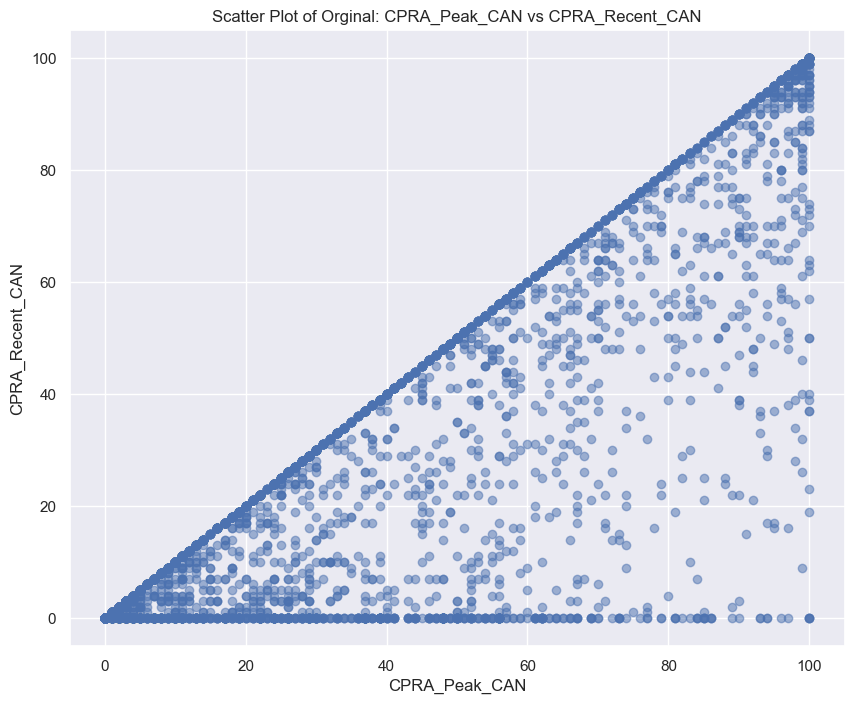

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df['CPRA_Peak_CAN'], y=df['CPRA_Recent_CAN'], alpha=0.5)
plt.xlabel('CPRA_Peak_CAN')
plt.ylabel('CPRA_Recent_CAN')
plt.title('Scatter Plot of Orginal: CPRA_Peak_CAN vs CPRA_Recent_CAN')
plt.grid(True)
plt.show()

##### `GaussianMixture:` Impute missing values based on the learned distribution of the data, ensuring that the imputed values are consistent with the overall data structure.

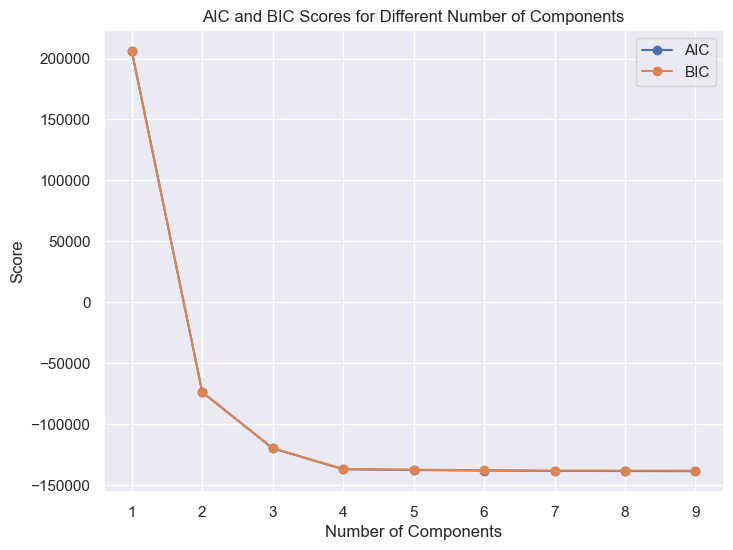

Optimal number of components: 9


In [17]:
ui.findGaussianMixtureComponents(df[features], RANDOM_STATE, component_range=range(1, 10), figsize=(8,6))

In [18]:
# impute
imputeGaussian = ui.imputeGaussianMixture(df[features], RANDOM_STATE, n_components=4, minimum=0, maximum=100)

# shape
print(f"Dataset Shape: {imputeGaussian.shape}")

Dataset Shape: (16126, 2)


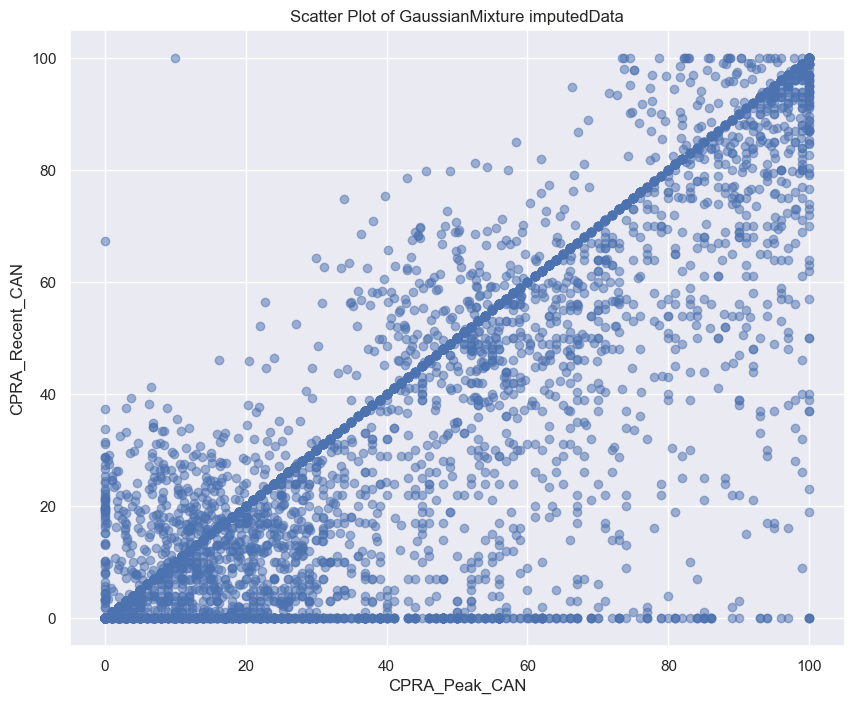

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(x=imputeGaussian['CPRA_Peak_CAN'], y=imputeGaussian['CPRA_Recent_CAN'], alpha=0.5)
plt.xlabel('CPRA_Peak_CAN')
plt.ylabel('CPRA_Recent_CAN')
plt.title('Scatter Plot of GaussianMixture imputedData')
plt.grid(True)
plt.show()

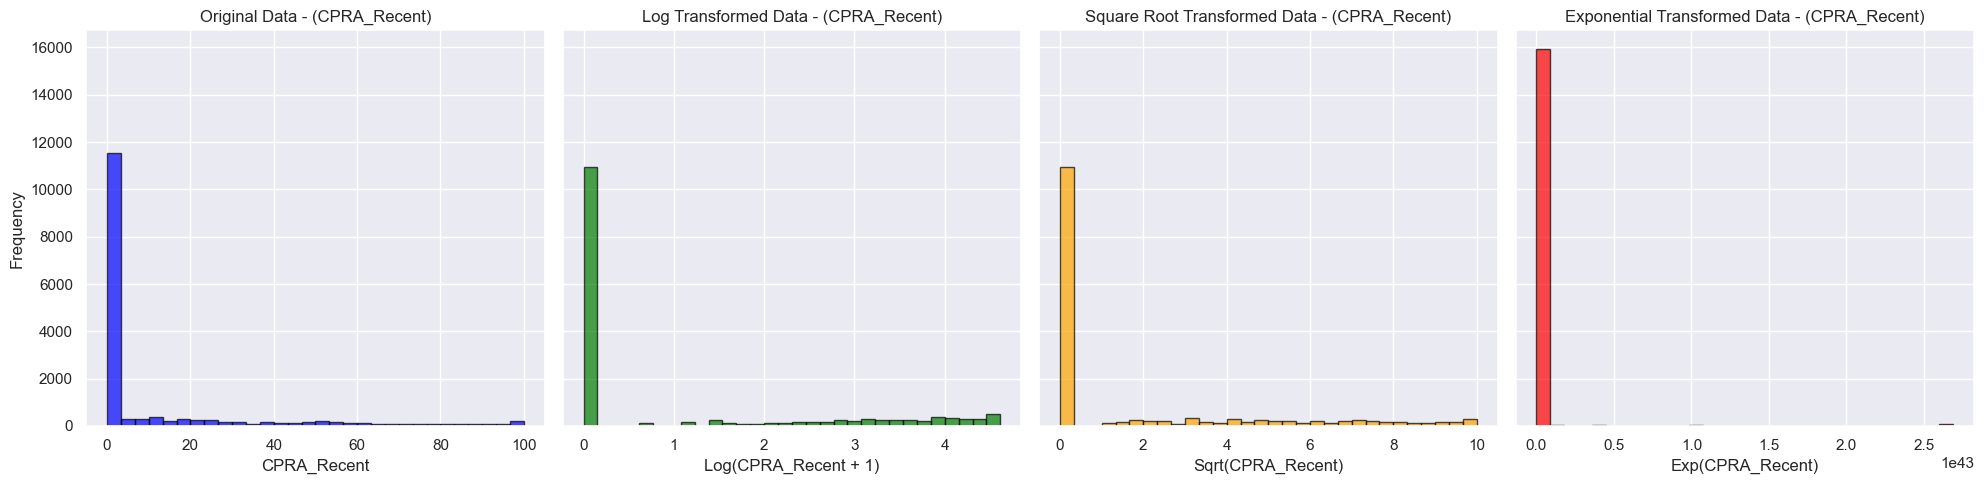

In [20]:
uv.transformPlots(imputeGaussian['CPRA_Recent_CAN'], txt='CPRA_Recent')

##### `KNN Impute:` Impute missing values in datasets using the k-Nearest Neighbors algorithm. 
- It replaces missing values with estimates based on similar data points in the dataset.
- For each sample with missing values, it finds the k nearest neighbors in the dataset.
    - It then imputes the missing value using the mean or weighted average of those neighbors' values.
- Preserves the original variable distribution.
- Does not assume any underlying data distribution.
- Can handle complex relationships in the data.
- KNN Imputation is a flexible and effective method for handling missing data, particularly when the relationships between variables are complex or non-linear.

The best n_neighbors for KNN imputer is: 7
The best weights for KNN imputer is: distance


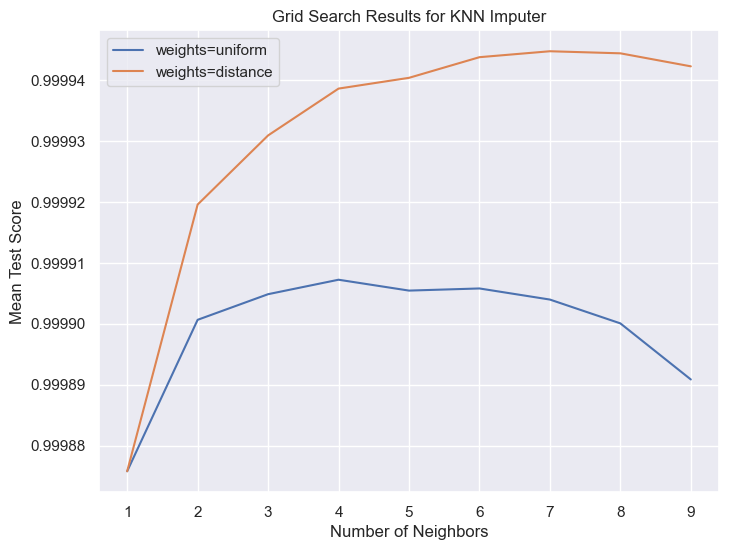

Dataset Shape: (16126, 2)


In [21]:
# impute
imputeKNN=ui.imputeKNN(df, ['CPRA_Peak_CAN','CPRA_Recent_CAN'])

# shape
print(f"Dataset Shape: {imputeKNN.shape}")

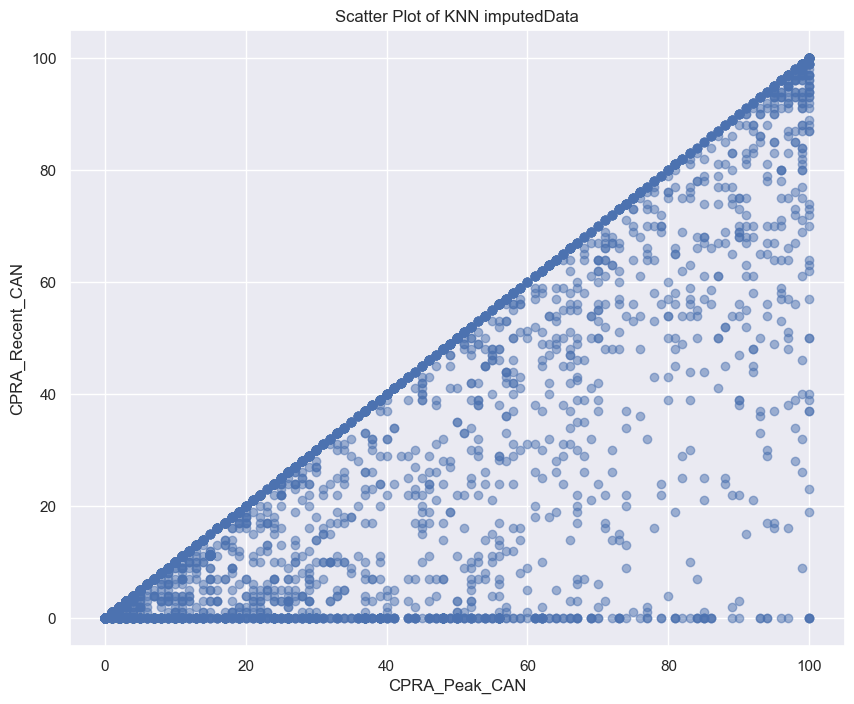

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(x=imputeKNN['CPRA_Peak_CAN'], y=imputeKNN['CPRA_Recent_CAN'], alpha=0.5)
plt.xlabel('CPRA_Peak_CAN')
plt.ylabel('CPRA_Recent_CAN')
plt.title('Scatter Plot of KNN imputedData')
plt.grid(True)
plt.show()

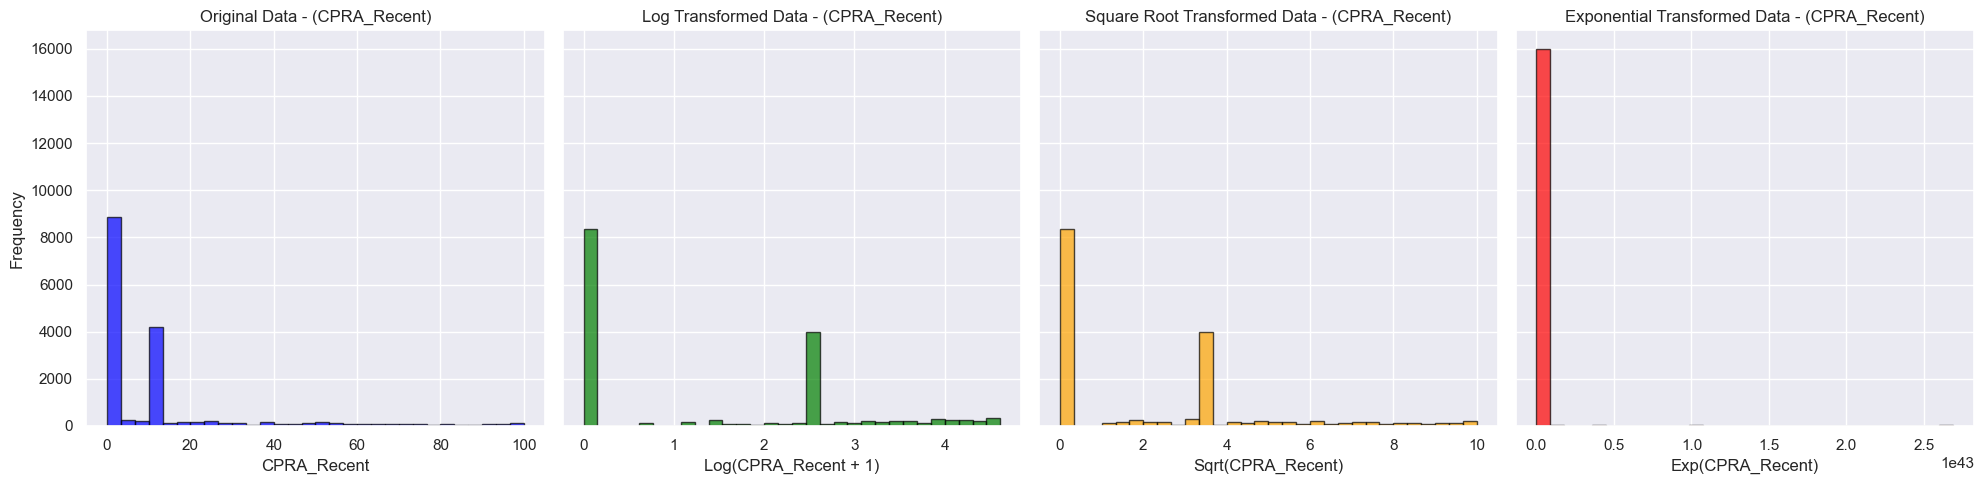

In [23]:
uv.transformPlots(imputeKNN['CPRA_Recent_CAN'], txt='CPRA_Recent')

In [24]:
imputeKNN.head()

,CPRA_Peak_CAN,CPRA_Recent_CAN
0,2.000000,2.000000
1,0.000000,0.000000
2,14.897144,11.228462
3,0.000000,0.000000
4,0.000000,0.000000


In [25]:
imputeGaussian.head()

,CPRA_Peak_CAN,CPRA_Recent_CAN
0,2.0,2.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [26]:
# Average the imputed values
imputeCombined = (np.floor(imputeKNN) + imputeGaussian) / 2

In [27]:
imputeCombined.head()

,CPRA_Peak_CAN,CPRA_Recent_CAN
0,2.0,2.0
1,0.0,0.0
2,7.0,5.5
3,0.0,0.0
4,0.0,0.0


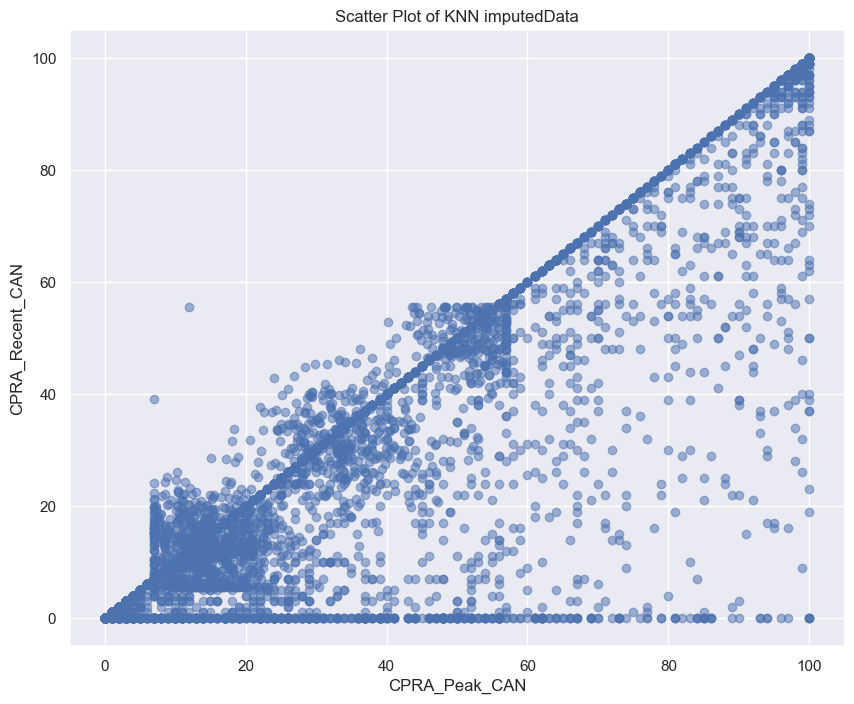

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(x=imputeCombined['CPRA_Peak_CAN'], y=imputeCombined['CPRA_Recent_CAN'], alpha=0.5)
plt.xlabel('CPRA_Peak_CAN')
plt.ylabel('CPRA_Recent_CAN')
plt.title('Scatter Plot of KNN imputedData')
plt.grid(True)
plt.show()

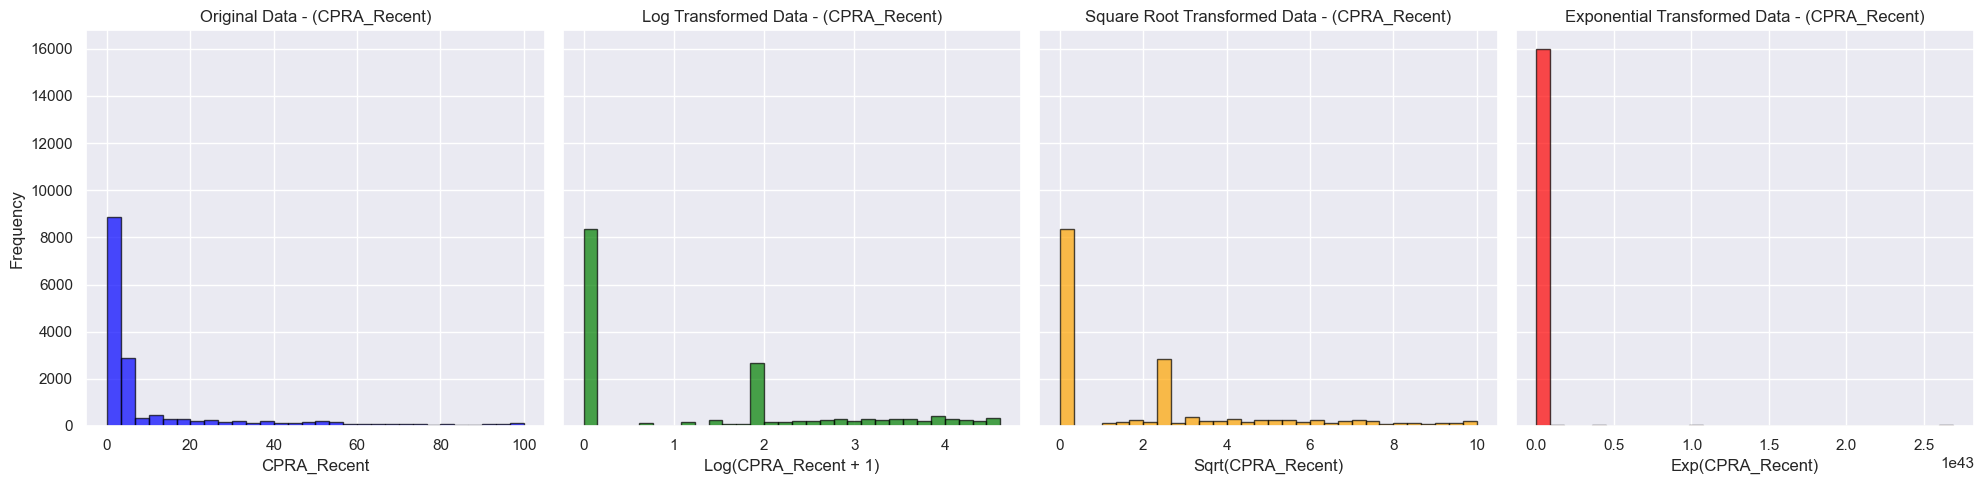

In [29]:
uv.transformPlots(imputeCombined['CPRA_Recent_CAN'], txt='CPRA_Recent')

##### imputeKNN

In [30]:
# round
imputeKNN = np.floor(imputeKNN)

# update original dataframe with imputed dataframe values
df.update(imputeKNN)

# create new feature: add small constant to handle 0 values
df['PanelReactiveAntibody_CPRA_Interaction_CAN'] = (df.CPRA_Recent_CAN + 1e-5) * (df.CPRA_Peak_CAN + 1e-5)
# create new feature difference & addition between CPRA_Peak_CAN & CPRA_Recent_CAN
df['PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN'] = df.CPRA_Peak_CAN - df.CPRA_Recent_CAN
df['PanelReactiveAntibody_CPRA_Addition_CAN'] = df.CPRA_Peak_CAN + df.CPRA_Recent_CAN

#### Creatinine

In [31]:
# examine features
features = getFeatureList(df[result], 'Creatinine(?!_DON)')

                              count      mean       std   min   25%   50%  75%   max
CreatinineRegistration_CAN  16016.0  1.386274  1.011872  0.08  0.95  1.20  1.5  24.0
CreatinineTransplant_CAN    15708.0  1.379902  1.060986  0.06  0.94  1.19  1.5  37.0

:::: NaN Count:
CreatinineRegistration_CAN    110
CreatinineTransplant_CAN      418


In [32]:
df[features].corr()

,CreatinineRegistration_CAN,CreatinineTransplant_CAN
CreatinineRegistration_CAN,1.000000,0.690318
CreatinineTransplant_CAN,0.690318,1.000000


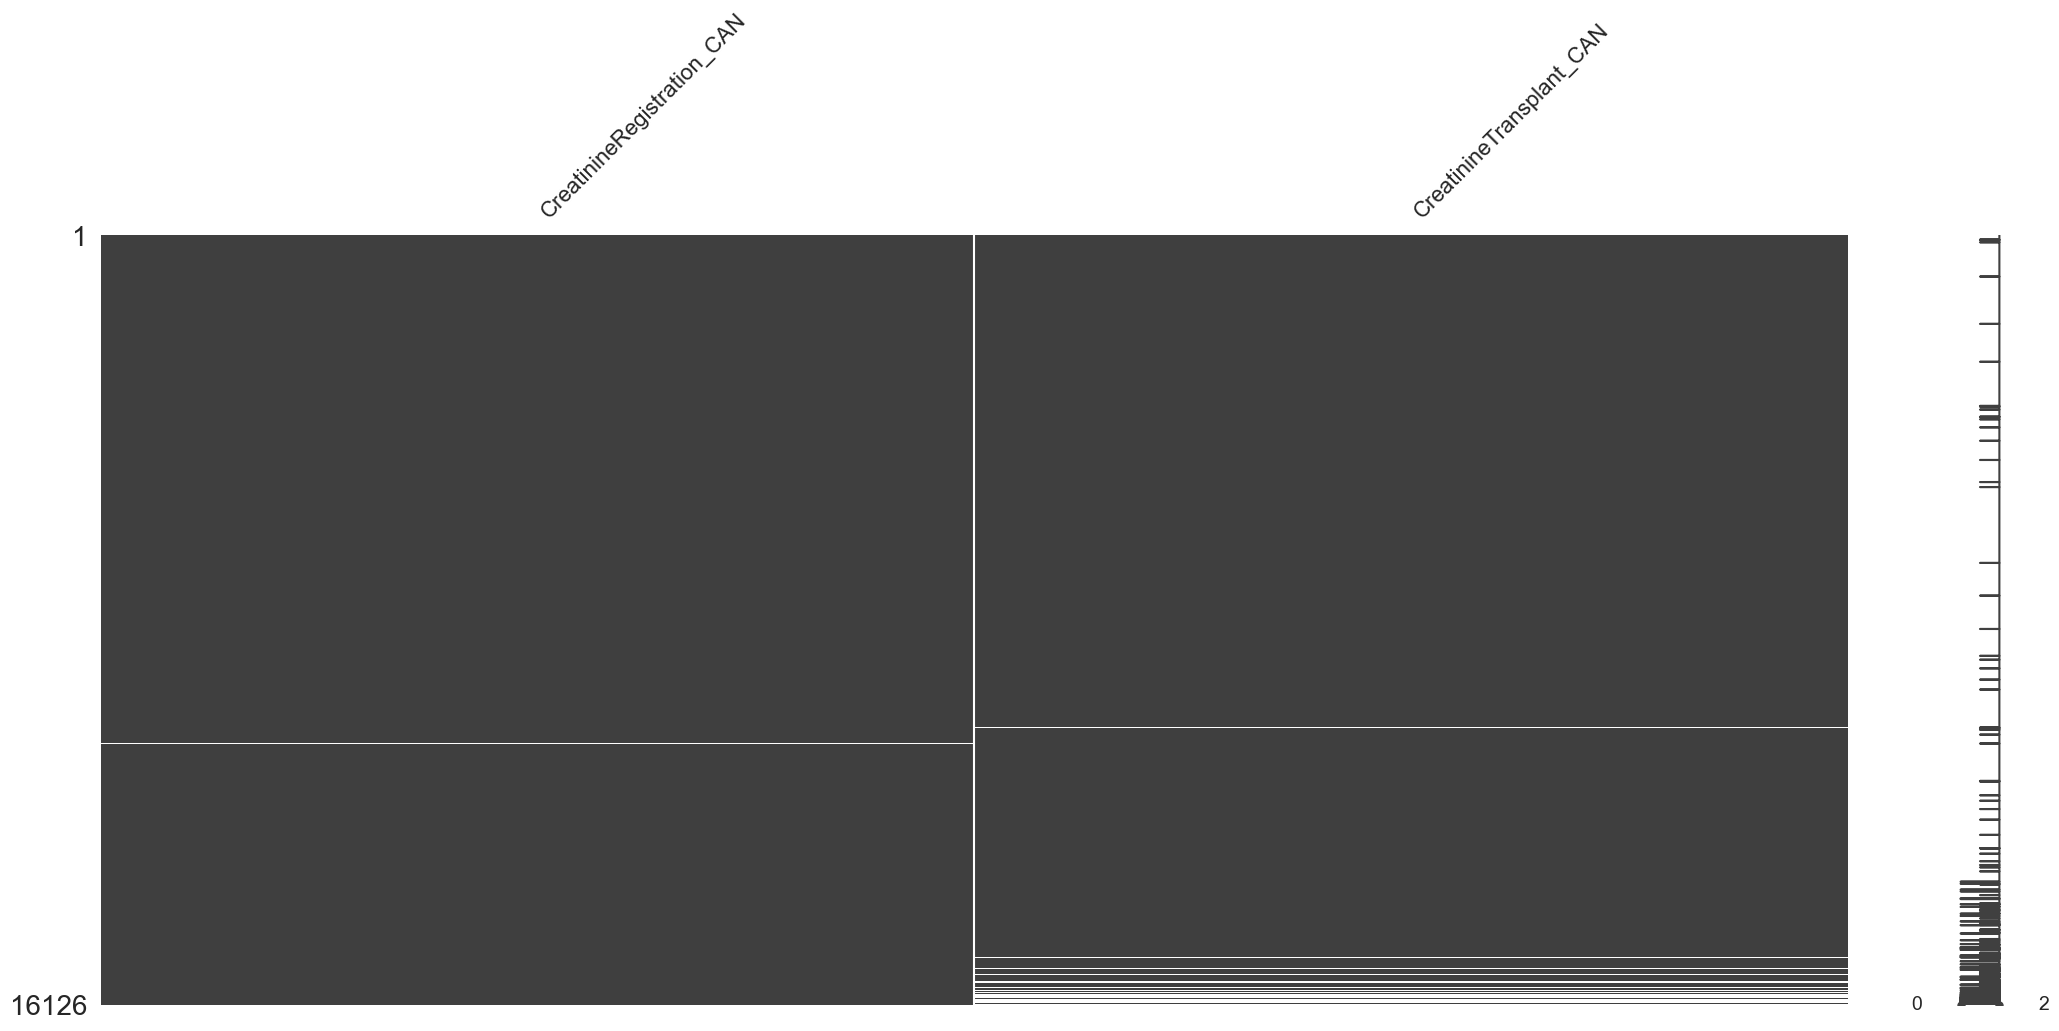

In [33]:
# plot missing data
uv.plotMissingData(df[features])

In [34]:
# hypothesis testing
usf.testMCAR(df[features])

Little's MCAR test p-value: 0.0700
Fail to reject null hypothesis: Data may be Missing Completely At Random (MCAR).


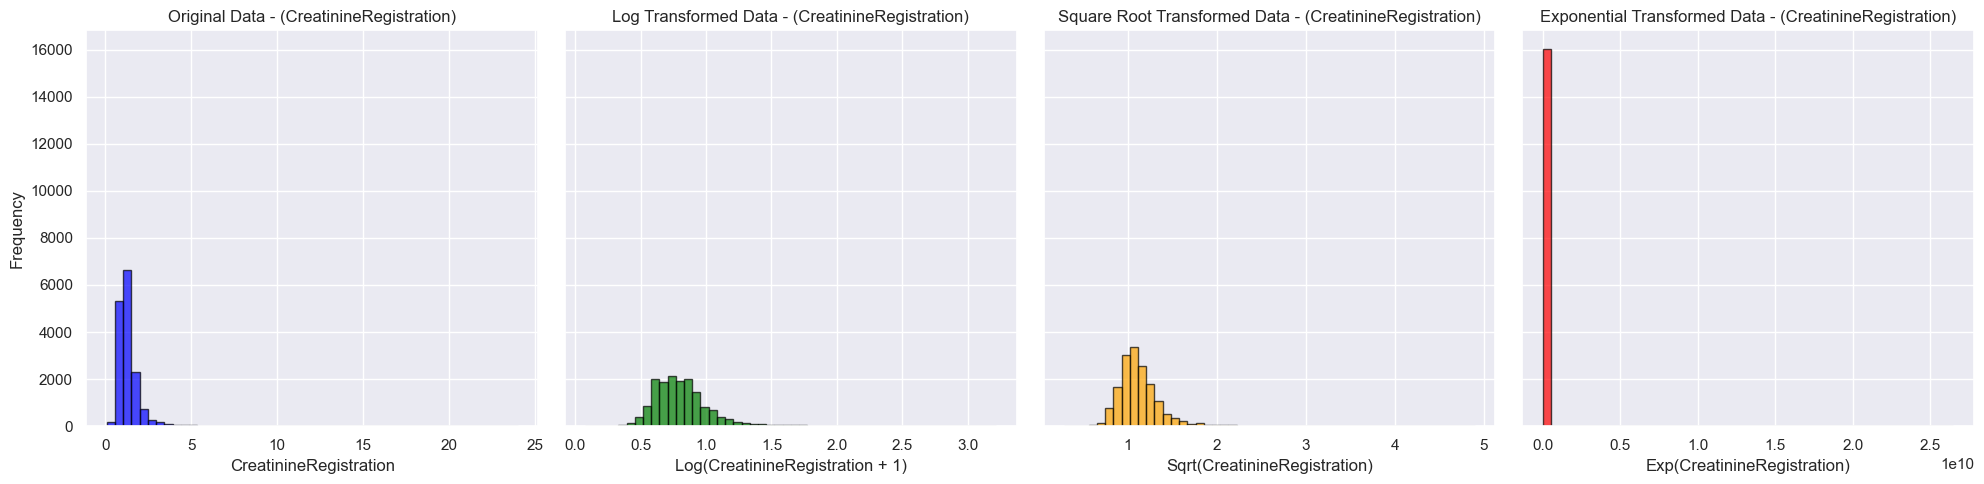

In [35]:
uv.transformPlots(df['CreatinineRegistration_CAN'], txt='CreatinineRegistration', bins=50)

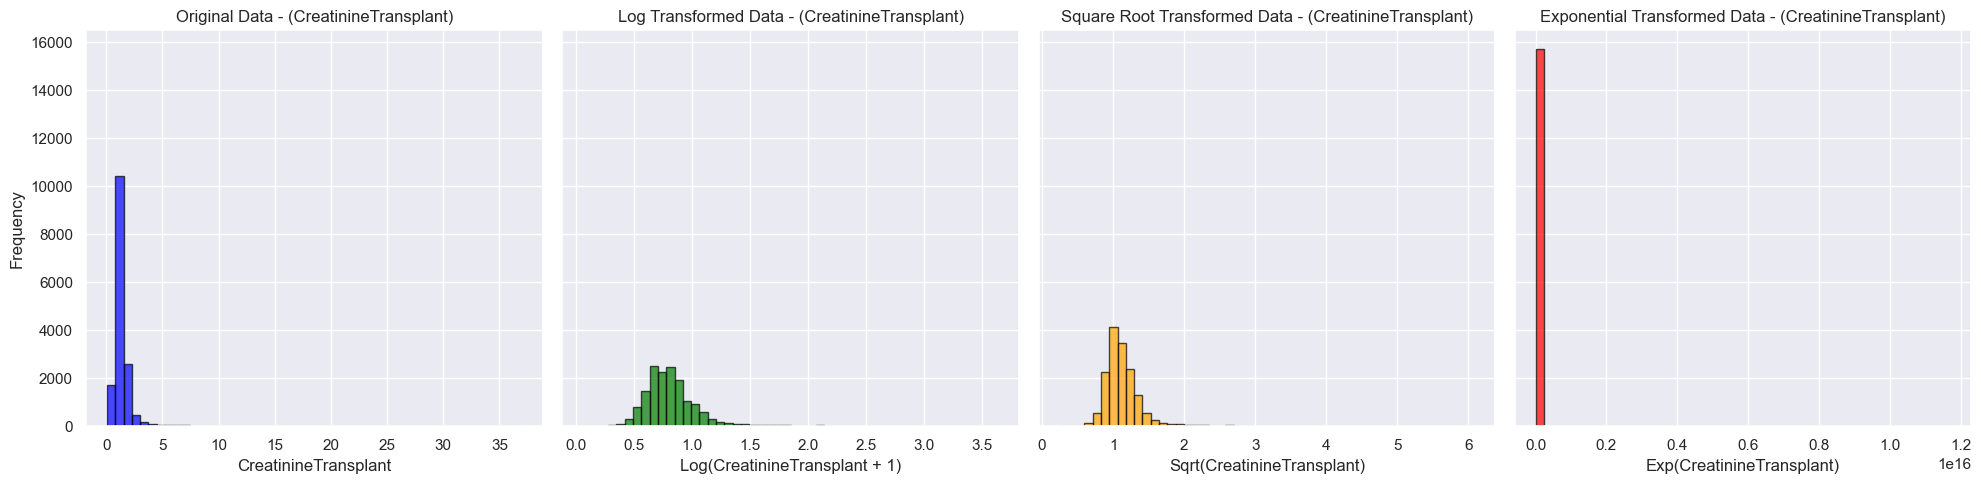

In [36]:
uv.transformPlots(df['CreatinineTransplant_CAN'], txt='CreatinineTransplant', bins=50)

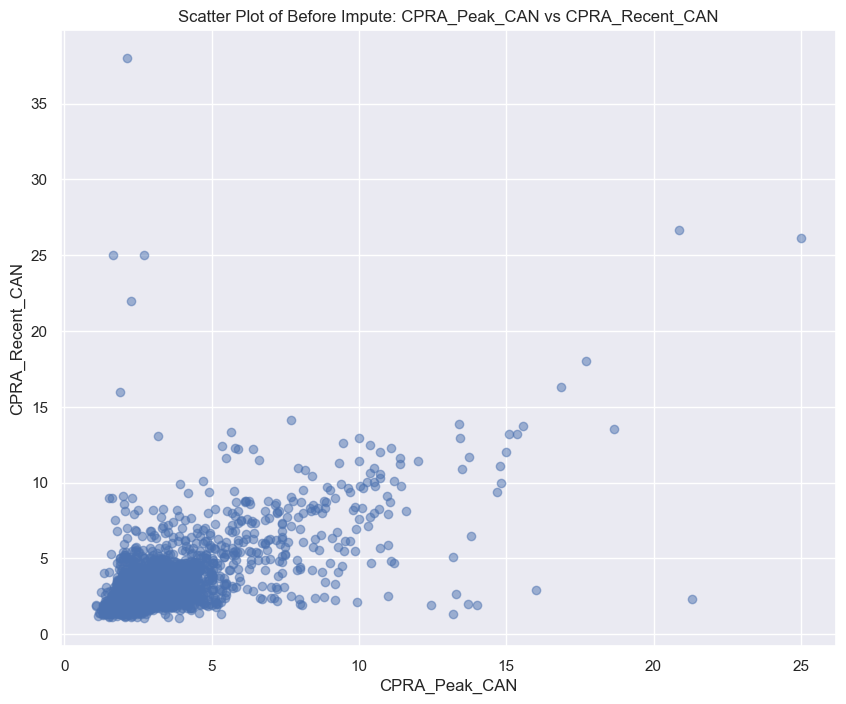

In [37]:
plt.figure(figsize=(10, 8))
plt.scatter(x=(df['CreatinineRegistration_CAN']+1), y=(df['CreatinineTransplant_CAN']+1), alpha=0.5)
plt.xlabel('CPRA_Peak_CAN')
plt.ylabel('CPRA_Recent_CAN')
plt.title('Scatter Plot of Before Impute: CPRA_Peak_CAN vs CPRA_Recent_CAN')
plt.grid(True)
plt.show()

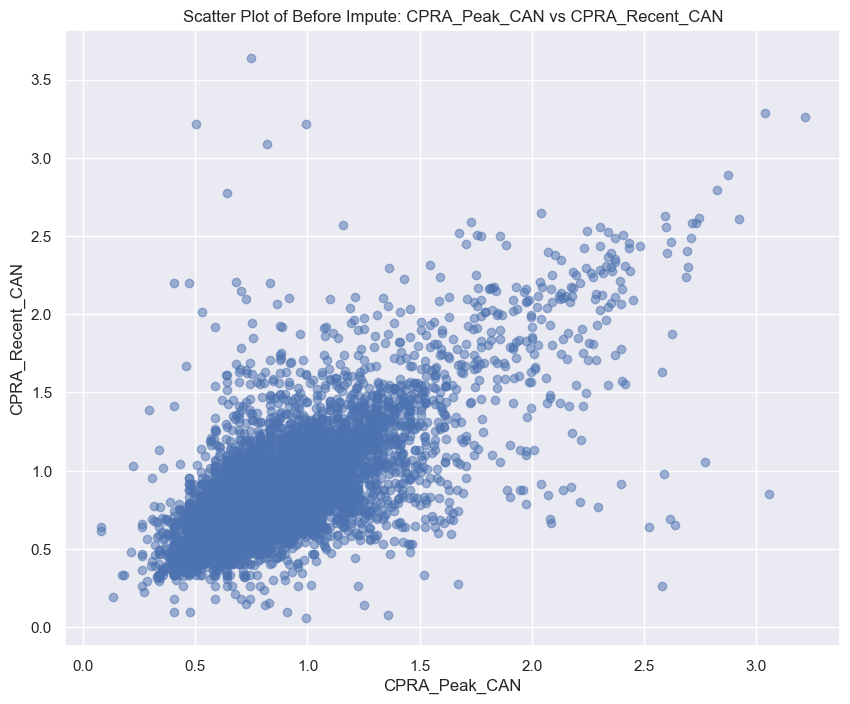

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(x=np.log(df['CreatinineRegistration_CAN']+1), y=np.log(df['CreatinineTransplant_CAN']+1), alpha=0.5)
plt.xlabel('CPRA_Peak_CAN')
plt.ylabel('CPRA_Recent_CAN')
plt.title('Scatter Plot of Before Impute: CPRA_Peak_CAN vs CPRA_Recent_CAN')
plt.grid(True)
plt.show()

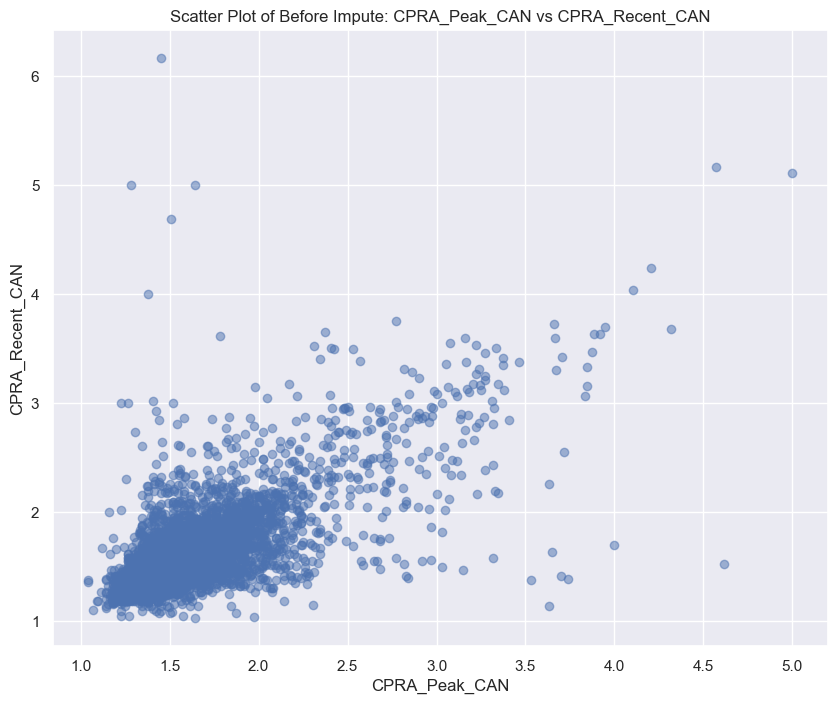

In [39]:
plt.figure(figsize=(10, 8))
plt.scatter(x=np.sqrt(df['CreatinineRegistration_CAN']+1), y=np.sqrt(df['CreatinineTransplant_CAN']+1), alpha=0.5)
plt.xlabel('CPRA_Peak_CAN')
plt.ylabel('CPRA_Recent_CAN')
plt.title('Scatter Plot of Before Impute: CPRA_Peak_CAN vs CPRA_Recent_CAN')
plt.grid(True)
plt.show()

### Save

In [40]:
# heart dataset: remove NaNs
uf.writeToFile(df_removeNaNs, 'Heart_ML_DropNaNs',path='../Data/', format='pkl')

# heart dataset
uf.writeToFile(df, 'Heart_ML_Orig',path='../Data/', format='pkl')


# heart label
uf.writeToFile(df_label, 'Label_ML',path='../Data/', format='pkl')

# heart candidate
uf.writeToFile(df_can, 'CAN_ML', format='pkl')

# heart donor
uf.writeToFile(df_don, 'DON_ML', format='pkl')

# heart both
uf.writeToFile(df_both, 'BOTH_ML', format='pkl')

# heart nominal
uf.writeToFile(df_nominal, 'Nominal_ML', format='pkl')

# heart ordinal
uf.writeToFile(df_ordinal, 'Ordinal_ML', format='pkl')

# heart numeric
uf.writeToFile(df_numeric, 'Numeric_ML', format='pkl')

# heart drop
uf.writeToFile(df_drop, 'Drop_ML', format='pkl')

# heart new
uf.writeToFile(df_new, 'New_ML', format='pkl')

# heart object
uf.writeToFile(df_object, 'Object_ML', format='pkl')

# heart unknown
uf.writeToFile(df_unknown, 'Unknown_ML', format='pkl')

# heart date
uf.writeToFile(df_date, 'Date_ML', format='pkl')

# heart data dictionary
uf.writeToFile(df_dict, 'Dictionary_ML', format='pkl')

9,850 records written to ../Data/Heart_ML_DropNaNs.pkl
16,126 records written to ../Data/Heart_ML_Orig.pkl
1 records written to ../Data/Label_ML.pkl
114 records written to ../Data/CAN_ML.pkl
88 records written to ../Data/DON_ML.pkl
22 records written to ../Data/BOTH_ML.pkl
166 records written to ../Data/Nominal_ML.pkl
12 records written to ../Data/Ordinal_ML.pkl
42 records written to ../Data/Numeric_ML.pkl
0 records written to ../Data/Drop_ML.pkl
29 records written to ../Data/New_ML.pkl
0 records written to ../Data/Object_ML.pkl
0 records written to ../Data/Unknown_ML.pkl
0 records written to ../Data/Date_ML.pkl
302 records written to ../Data/Dictionary_ML.pkl
